<a href="https://colab.research.google.com/github/Kurnosenko/-/blob/main/IMDB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
#Файл находится по указанному пути "/content/drive/MyDrive/".
df = pd.read_csv("/content/drive/MyDrive/IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
sa = pd.read_excel("/content/Лист Microsoft Excel.xlsx")

In [ ]:
#1. s = pd.Series(sa['review']): Мы создаем серию данных s, которая содержит столбец 'review' из исходного набора данных sa.
#2. s = s.str.lower(): Здесь мы преобразуем все буквы в строках серии s в нижний регистр.
#3. import string: Мы импортируем модуль string, который содержит различные константы для работы со строками, например, набор пунктуационных символов.
#4. s = [''.join(char for char in item if char not in string.punctuation) for item in s if item != '']: Здесь мы создаем новый список, в котором каждая строка из серии s очищается от всех знаков пунктуации, используя список пунктуационных символов из модуля string. Мы также исключаем пустые строки.
#5. sa.review = s: Мы заменяем столбец 'review' в исходном наборе данных sa на очищенные строки из списка s.
s = pd.Series(sa['review'])
s = s.str.lower()
import string
s = [''.join(char for char in item
                    if char not in string.punctuation)
            for item in s if item != '']
sa.review = s

In [ ]:
 #1Мы создаем новый датафрейм df_positive, который содержит первые 4500 строк из исходного датафрейма df, где значение в столбце 'sentiment' равно 'positive'.

#2 Здесь мы создаем новый датафрейм df_negative, который содержит первые 500 строк из исходного датафрейма df, где значение в столбце 'sentiment' равно 'negative'.

 #3 Мы объединяем датафреймы df_positive и df_negative по строкам в новом датафрейме df_imb, тем самым создавая датафрейм с несбалансированным соотношением между положительными и отрицательными отзывами.

#4 мы создаем новый датафрейм df_pos_half, который содержит первые 7500 строк из исходного датафрейма df, где значение в столбце 'sentiment' равно 'positive'.

 #5 Мы создаем новый датафрейм df_neg_half, который содержит первые 7500 строк из исходного датафрейма df, где значение в столбце 'sentiment' равно 'negative'.

# 6 Мы объединяем датафреймы df_pos_half и df_neg_half по строкам в новом датафрейме df_half, создавая датафрейм с сбалансированным соотношением между положительными и отрицательными отзывами.
df_positive = df[df['sentiment']=='positive'][:4500]
df_negative = df[df['sentiment']=='negative'][:500]

df_imb = pd.concat([df_positive,df_negative ])

df_pos_half = df[df['sentiment']=='positive'][:7500]
df_neg_half = df[df['sentiment']=='negative'][:7500]

df_half = pd.concat([df_pos_half, df_neg_half])

In [ ]:
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state= 0)
# df_bal,df_bal['sentiment']=rus.fit_resample(df_imb[['review']],df_imb['sentiment'])


# df_bal

In [ ]:
#После выполнения этого кода будет выведен результат подсчета уникальных значений столбца 'sentiment' в датафрейме df_imb, который покажет,
#сколько положительных и отрицательных отзывов имеется в каждой категории.
print(df_imb.value_counts('sentiment'))
#print(df_bal.value_counts('sentiment'))

sentiment
positive    4500
negative     500
Name: count, dtype: int64


In [ ]:
#Этот код использует функцию train_test_split из библиотеки sklearn.model_selection для разделения исходного датафрейма df_imb на две части: обучающую выборку (train) и тестовую выборку (test).
#Параметр test_size = 0.20 указывает, что размер тестовой выборки составляет 20% от всего набора данных.
#Параметр random_state = 42 используется для воспроизводимости результатов.
from sklearn.model_selection import train_test_split

train,test = train_test_split(df_imb,test_size =0.20,random_state=42)

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [ ]:
#Этот код возвращает количество уникальных значений в переменной train_y и показывает, сколько раз каждое значение встречается в этой переменной.
#Это полезно для анализа распределения классов в целевой переменной обучающей выборки.
train_y.value_counts()

sentiment
positive    3611
negative     389
Name: count, dtype: int64

In [ ]:
#Переменная df_half представляет собой исходный датафрейм, который содержит какие-то данные, например, отзывы и их эмоциональную окраску (sentiment).
#train_test_split(df_half, test_size=0.20, random_state=42) разделяет данные на две части: обучающую и тестовую выборки.
#Параметр test_size=0.20 указывает, что 20% данных будут выделены для тестирования, а 80% останутся для обучения модели.
#Параметр random_state=42 гарантирует воспроизводимость разделения данных.
#Затем из обучающей выборки train_half извлекаются две переменные: train_x_half,
#которая содержит данные с отзывами для обучения, и train_y_half, которая содержит данные с эмоциональной окраской (sentiment) для обучения модели.
train_half,test_half = train_test_split(df_half,test_size =0.20,random_state=42)
train_x_half, train_y_half = train_half['review'], train_half['sentiment']
test_x_half, test_y_half = test_half['review'], test_half['sentiment']

In [ ]:
#Этот код позволяет подсчитать количество уникальных значений в переменной train_y_half и вывести результаты подсчета.
#Функция value_counts() применяется к переменной train_y_half для подсчета количества каждого уникального значения в этой переменной.
#Результаты подсчета показывают, сколько раз каждое уникальное значение встречается в переменной train_y_half.
train_y_half.value_counts()

sentiment
negative    6007
positive    5993
Name: count, dtype: int64

In [ ]:
#Этот код предназначен для подсчета количества уникальных значений в переменной train_y_half и вывода результатов подсчета.
#Функция value_counts() используется для того, чтобы посчитать, сколько раз каждое уникальное значение встречается в переменной train_y_half.
#Таким образом, после выполнения этого кода вы увидите, сколько раз каждое уникальное значение встречается в переменной train_y_half.
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(train_x)
#tfidf.fit(test_y)

train_x_vector = tfidf.transform(train_x)
test_x_vector = tfidf.transform(test_x)

train_x_half_vector = tfidf.transform(train_x_half)
test_x_half_vector = tfidf.transform(test_x_half)


In [ ]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,0001,007,007s,00s,01,0126,02,04,0510,...,ángel,ça,élan,émigré,émigrés,étcother,ís,ísnt,ïn,óli
8422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pd.DataFrame.sparse.from_spmatrix(train_x_half_vector,
                                  index=train_x_half.index,
                                  columns=tfidf.get_feature_names_out())

,00,0001,007,007s,00s,01,0126,02,04,0510,...,ángel,ça,élan,émigré,émigrés,étcother,ís,ísnt,ïn,óli
4639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7573,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11788,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

# 1/2
log_reg.fit(train_x_half_vector,train_y_half)


LogisticRegression()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)


dec_tree.fit(train_x_half_vector, train_y_half)


DecisionTreeClassifier()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

#
gnb.fit(train_x_half_vector.toarray(), train_y_half)


GaussianNB()

In [ ]:
DEC_TREE_ACC = dec_tree.score(test_x_vector, test_y)
GNB_ACC = gnb.score(test_x_vector.toarray(), test_y)
LR_ACC = log_reg.score(test_x_vector, test_y)
print("Accuracy when data is pos = 9000 and neg = 1000")
print(DEC_TREE_ACC)
print(GNB_ACC)
print(LR_ACC)

DEC_TREE_ACC_half = dec_tree.score(test_x_half_vector, test_y_half)
GNB_ACC_half = gnb.score(test_x_half_vector.toarray(), test_y_half)
LR_ACC_half = log_reg.score(test_x_vector, test_y)
print("Accuracy when data is pos = 5000 and neg = 5000")
print(DEC_TREE_ACC_half)
print(GNB_ACC_half)
print(LR_ACC_half)

Accuracy when data is pos = 9000 and neg = 1000
0.913
0.677
0.936
Accuracy when data is pos = 5000 and neg = 5000
0.7143333333333334
0.5806666666666667
0.936


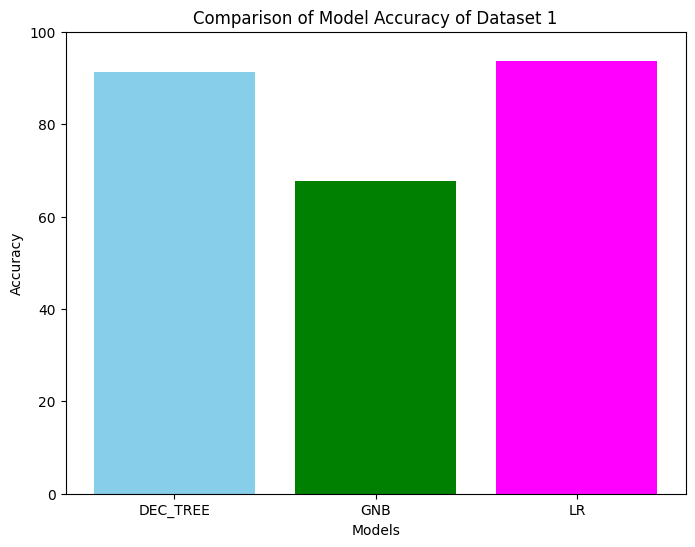

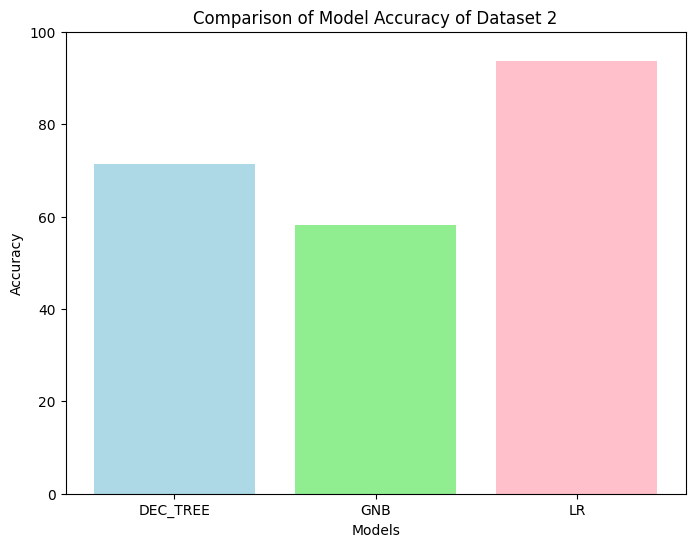

In [ ]:
import matplotlib.pyplot as plt

models = ['DEC_TREE', 'GNB', 'LR']
accuracy_scores = [DEC_TREE_ACC*100, GNB_ACC*100, LR_ACC*100]
colors = ['green', 'red', 'orange']

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['skyblue', 'green', 'magenta'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy of Dataset 1')
plt.ylim(0, 100)
plt.show()

accuracy_scores_half = [DEC_TREE_ACC_half*100, GNB_ACC_half*100, LR_ACC_half*100]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores_half, color=['lightblue', 'lightgreen', 'pink'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy of Dataset 2')
plt.ylim(0, 100)
plt.show()

In [ ]:
lst = [[' '], ['Black Mirror is a very good movie']]

df2 = pd.DataFrame(lst, columns =['Text'])

print(df2)

                                                Text
0  The film Titanic seemed to me very boring and ...
1                  Black Mirror is a very good movie


In [ ]:
sa = tfidf.transform(sa['review'])

In [ ]:
log_reg.predict(sa)

array(['positive', 'positive'], dtype=object)